In [10]:
%matplotlib inline

import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
from config import CLIENT_ID, CLIENT_SECRET
from pprint import pprint
import json
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [11]:
spotify = spotipy.Spotify()
credentials = oauth2.SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET)

token = credentials.get_access_token()
spotify = spotipy.Spotify(auth=token)

In [12]:
merge_df = pd.read_csv('Resources/merged_data.csv')
merge_df

,Country,Name,Artist,Album,Genre,Rank,Source,Spotify ID
0,Hong Kong,Into the Unknown,Idina Menzel & AURORA,Frozen 2 (Original Motion Picture Soundtrack /...,Soundtrack,1,Apple,3Z0oQ8r78OUaHvGPiDBR3W
1,Hong Kong,Señorita,Shawn Mendes & Camila Cabello,Señorita - Single,Pop,2,Apple,0TK2YIli7K1leLovkQiNik
2,Hong Kong,說好不哭,周杰倫 & 阿信,說好不哭 - Single,Pop,3,Apple,56wVfJKtnwlSZtC4NVgIrf
3,Hong Kong,Show Yourself,Idina Menzel & Evan Rachel Wood,Frozen 2 (Original Motion Picture Soundtrack /...,Soundtrack,4,Apple,50WeOnXhM1H7AZEeIDoWfZ
4,Hong Kong,Memories,魔力紅樂團,Memories - Single,Pop,5,Apple,2b8fOow8UzyDFAE27YhOZM
...,...,...,...,...,...,...,...,...
130,Hong Kong,Señorita,Shawn Mendes & Camila Cabello,Señorita - Single,Pop,1,Spotify,0TK2YIli7K1leLovkQiNik
131,Hong Kong,Memories,Maroon 5,Memories - Single,Pop,2,Spotify,2b8fOow8UzyDFAE27YhOZM
132,Hong Kong,Circles,Post Malone,Hollywood's Bleeding,Hip-Hop/Rap,3,Spotify,21jGcNKet2qwijlDFuPiPb
133,Hong Kong,everything i wanted,Billie Eilish,everything i wanted - Single,Alternative,4,Spotify,3ZCTVFBt2Brf31RLEnCkWJ


In [13]:
danceability = []
energy = []
key = []
loudness = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
duration_ms = []

track_features = spotify.audio_features(tracks='3Z0oQ8r78OUaHvGPiDBR3W')

pprint(track_features)

[{'acousticness': 0.849,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3Z0oQ8r78OUaHvGPiDBR3W',
  'danceability': 0.323,
  'duration_ms': 194848,
  'energy': 0.405,
  'id': '3Z0oQ8r78OUaHvGPiDBR3W',
  'instrumentalness': 0.000544,
  'key': 10,
  'liveness': 0.138,
  'loudness': -8.533,
  'mode': 0,
  'speechiness': 0.0413,
  'tempo': 145.104,
  'time_signature': 5,
  'track_href': 'https://api.spotify.com/v1/tracks/3Z0oQ8r78OUaHvGPiDBR3W',
  'type': 'audio_features',
  'uri': 'spotify:track:3Z0oQ8r78OUaHvGPiDBR3W',
  'valence': 0.274}]


In [14]:
for index, row in merge_df.iterrows():
    try:
        track_features = spotify.audio_features(tracks=row['Spotify ID'])
        danceability.append(track_features[0]["danceability"])
        energy.append(track_features[0]["energy"])
        key.append(track_features[0]["key"])
        loudness.append(track_features[0]["loudness"])
        speechiness.append(track_features[0]["speechiness"])
        acousticness.append(track_features[0]["acousticness"])
        instrumentalness.append(track_features[0]["instrumentalness"])
        liveness.append(track_features[0]["liveness"])
        valence.append(track_features[0]["valence"])
        tempo.append(track_features[0]["tempo"])
        duration_ms.append(track_features[0]["duration_ms"])
    except:
        print(f"Couldn't find details for {row['Spotify ID']}")
        continue


In [7]:
merge_df["danceability"] = danceability
merge_df["energy"] = energy
merge_df["key"] = key
merge_df["loudness"] = loudness
merge_df["speechiness"] = speechiness
merge_df["acousticness"] = acousticness
merge_df["instrumentalness"] = instrumentalness
merge_df["liveness"] = liveness
merge_df["valence"] = valence
merge_df["tempo"] = tempo
merge_df["duration_ms"] = duration_ms

In [17]:
merge_df.to_csv("Resources/track_analysis_final.csv")


In [18]:
country_df = merge_df.groupby(["Country"])
mean_value = country_df.mean()
country_mean = mean_value.reset_index()

country_mean

,Country,Rank
0,Australia,3
1,Canada,3
2,France,3
3,Germany,3
4,Hong Kong,3
5,Japan,3
6,Netherlands,3
7,UK,3
8,US,3


In [ ]:
output_file = country_mean.to_csv('Resources/track_analysis.csv')

KeyError: 'danceability'

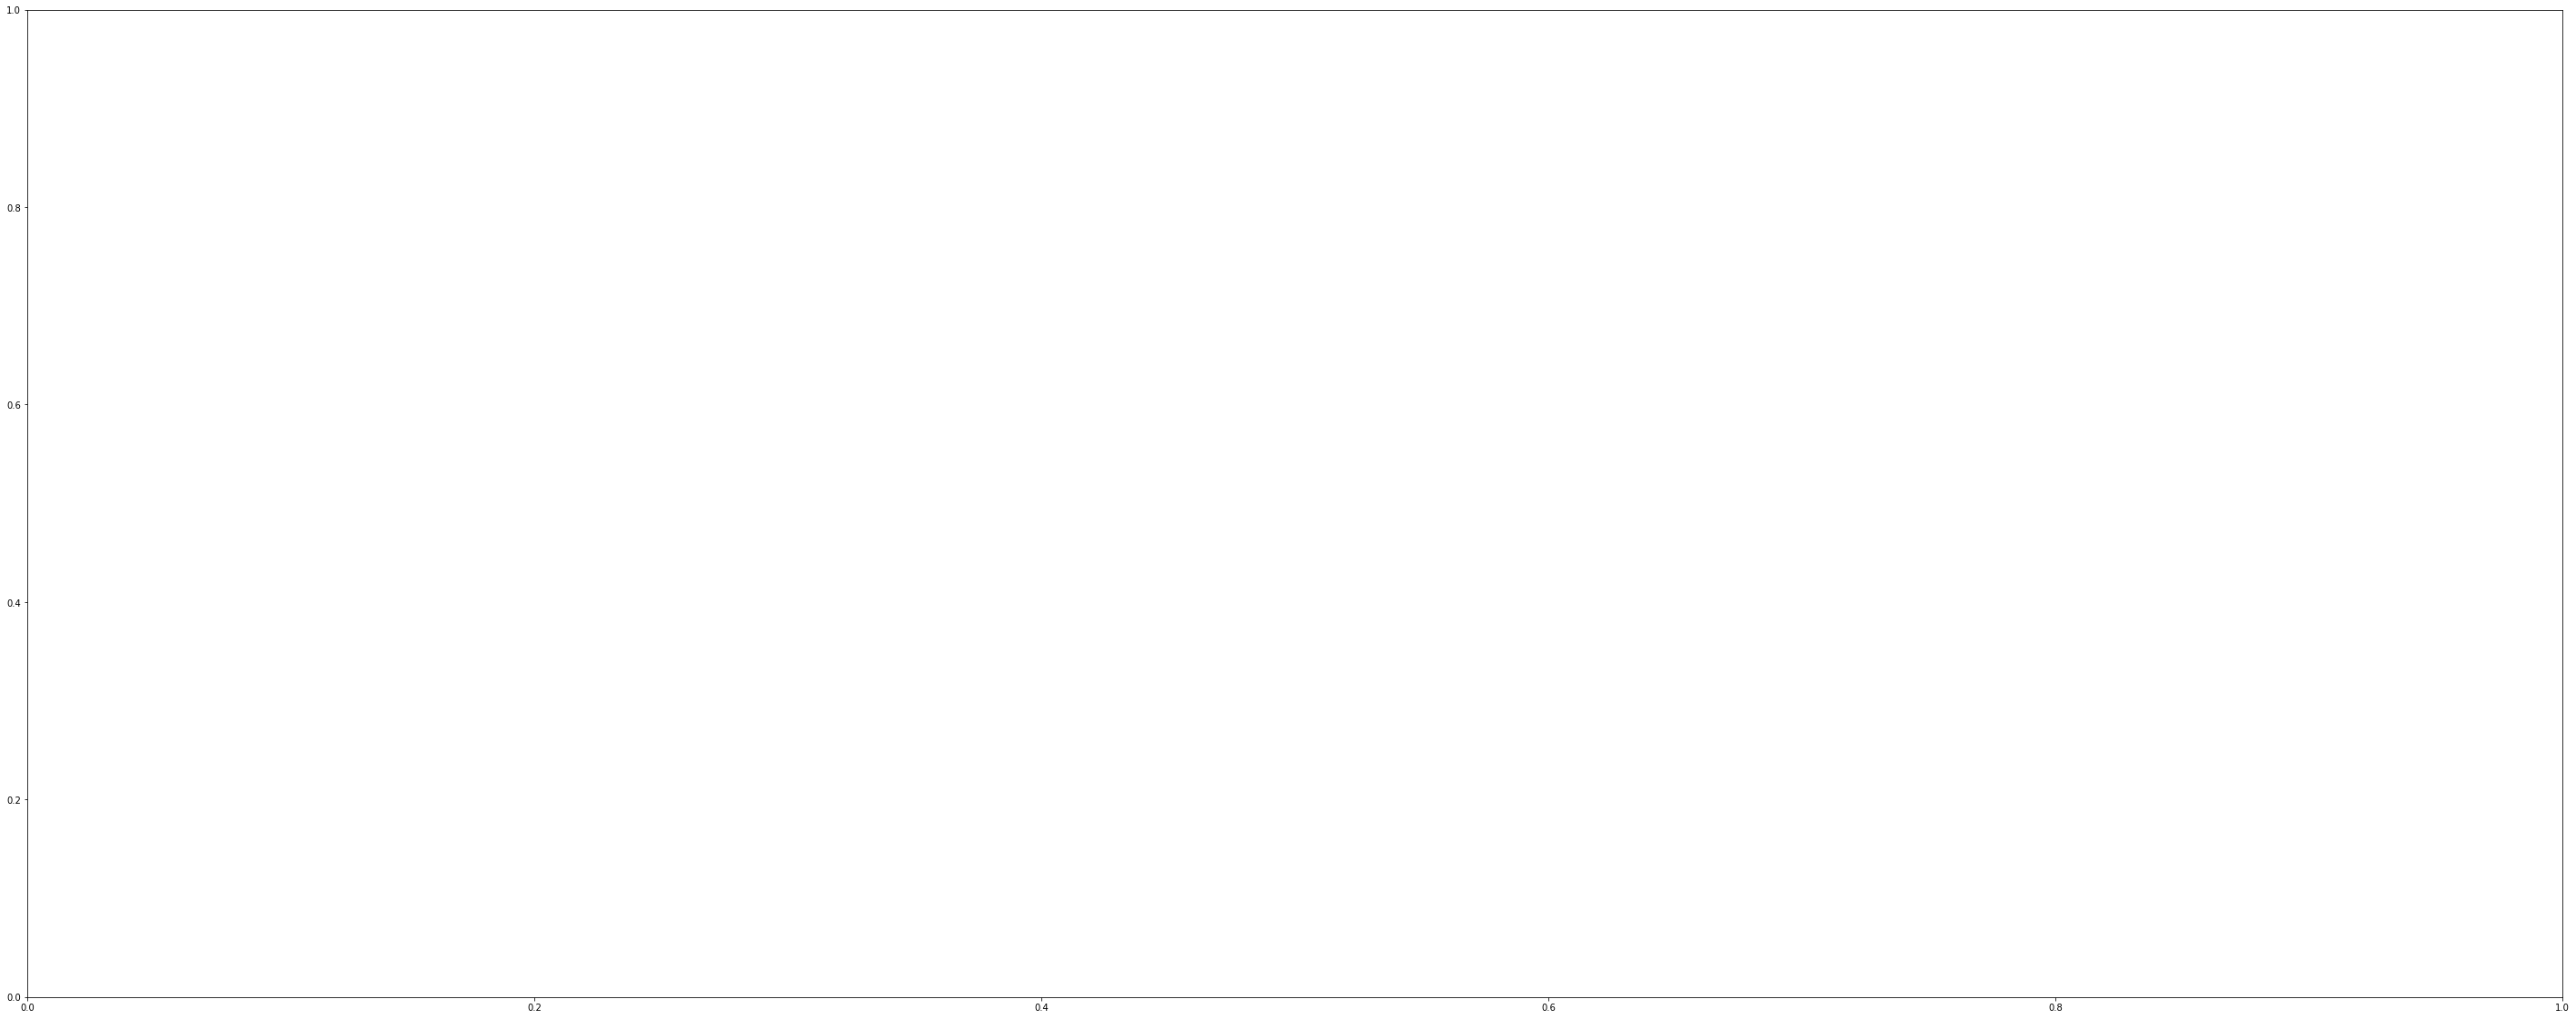

In [16]:
x_axis = np.arange(len(country_mean))
tick_locations = [value for value in x_axis]
fig,ax=plt.subplots(figsize=(50,20))

bar_1=plt.bar(x_axis+0.10, country_mean["danceability"], label="danceability", color='r', width=0.10)
bar_2=plt.bar(x_axis+0.20, country_mean["energy"],label="energy", color='g', width=0.10)
bar_3=plt.bar(x_axis+0.30, country_mean["speechiness"], label="speechiness",color='b', width=0.10)
bar_4=plt.bar(x_axis+0.40, country_mean["acousticness"], label="acousticness", color='y', width=0.10)
bar_5=plt.bar(x_axis+0.50, country_mean["instrumentalness"], label="instrumentalness",color='purple', width=0.10)
bar_6=plt.bar(x_axis+0.60, country_mean["liveness"],label="liveness", color='c', width=0.10)
bar_7=plt.bar(x_axis+0.70, country_mean["valence"],label="valence",  color='darkorange', width=0.10)

plt.legend()
plt.grid()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2,.5*height,"%d" %int(height)+ "%",ha="center",va="bottom",color="white")
        
autolabel(bar_1)
autolabel(bar_2)
autolabel(bar_3)
autolabel(bar_4)
autolabel(bar_5)
autolabel(bar_6)
autolabel(bar_7)


In [ ]:

new_audiofeature = 